In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

file_Referee_202323 = 'Database/2022-2023_NBA_Referee_Stats.csv'
file_Player_202324 = 'Database/NBA_202324_NBA_Regular.csv'
file_Salary_202324 = 'Databse/NBA_Salary_202324.xlsx'
file_team_23 = 'Database/NBA_Salary_202324.csv'

In [2]:
def file_to_import(fileName,fileType = 'csv'):
    #Imports the specified table to be used
    if fileType == 'csv':
        df = pd.read_csv(fileName)
        
    elif fileType == 'xlsx':
        df = pd.read_excel(fileName)
    
    print(df.head())
    print(df.info())
    print("Row info:", df.index)
    return df

In [3]:
def plotGraph(graphType, df, xData,yData, xName = 'X', 
              yName = 'Y', titleName = 'Graph', figSizeX = 6.4,\
              figSizeY = 4.8, legendData = None, display = False):
    
    #Use this function to create a graph. NOTE: Dont forget to set display = True to show the graph.

    #Checks to see if it is a special graph else plot using pandas DataFrame.
    if graphType == 'boxplot':
        sns.boxplot(x= xData, y= yData, data = df)
    elif graphType == 'lmplot':
        sns.lmplot(x= xData, y= yData, data = df)
    else:
        df.plot(x= xData, y= yData, kind = graphType)
    
    #Set labels
    if legendData:
        plt.legend(legendData)
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.title(titleName)
    plt.figure(figsize=(figSizeX, figSizeY))
    #Choose if you want to display the graph
    if display:
        plt.show()
        plt.clf()   

#Example to call: plotGraph('lmplot',df, "AGE", 'GP')

In [4]:
df = file_to_import(file_Player_202324)


   RANK                     NAME TEAM POS   AGE  GP   MPG  USG%   TO%  FTA  \
0   NaN              Joel Embiid  Phi   C  30.1  39  33.6  39.6  15.0  452   
1   NaN              Luka Doncic  Dal   G  25.1  70  37.5  36.0  14.6  608   
2   NaN    Giannis Antetokounmpo  Mil   F  29.4  73  35.2  33.0  15.4  782   
3   NaN  Shai Gilgeous-Alexander  Okc   G  25.8  75  34.0  32.9   9.8  649   
4   NaN            Jalen Brunson  Nyk   G  27.6  77  35.4  32.5  10.1  497   

   ...  APG  SPG  BPG  TPG   P+R   P+A  P+R+A    VI   ORtg   DRtg  
0  ...  5.6  1.2  1.7  3.8  45.7  40.3   51.3  15.3  124.0  104.8  
1  ...  9.8  1.4  0.5  4.0  43.1  43.7   52.9  15.5  121.9  109.9  
2  ...  6.5  1.2  1.1  3.4  42.0  37.0   48.5  14.9  125.6  106.9  
3  ...  6.2  2.0  0.9  2.2  35.6  36.3   41.8  11.9  128.6  107.7  
4  ...  6.7  0.9  0.2  2.4  32.3  35.5   39.1  10.0  124.2  112.6  

[5 rows x 29 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 29 colum

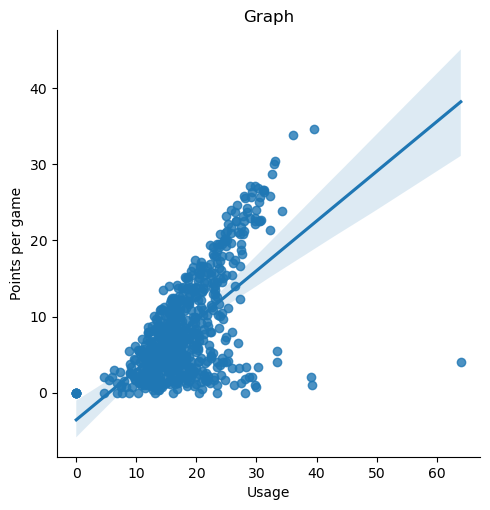

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

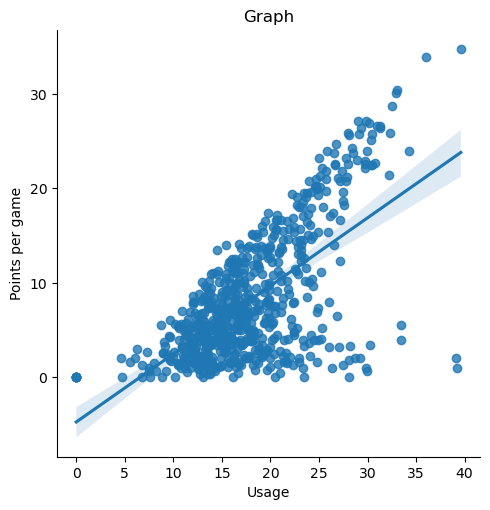

<Figure size 640x480 with 0 Axes>

,TEAM,NAME,PPG,USG%
0,Phi,Joel Embiid,34.7,39.6
619,Phi,Kenneth Lofton Jr.,1.0,39.2
558,Mil,Lindell Wigginton,2.0,39.1
1,Dal,Luka Doncic,33.9,36.0
22,Cha,LaMelo Ball,23.9,34.3
...,...,...,...,...
646,Det,Malcolm Cazalon,0.0,0.0
647,Tor,Ron Harper Jr.,0.0,0.0
650,Tor,Kira Lewis Jr.,0.0,0.0
652,Min,Justin Jackson,0.0,0.0


<Figure size 640x480 with 0 Axes>

In [98]:
#Is there a correlation between USG% (Usage Percentage) and PPG?
plotGraph('lmplot',df, "USG%", 'PPG', xName = 'Usage', yName= 'Points per game',display = True)

Usage_Rating = df[['TEAM', 'NAME', 'PPG', 'USG%' ]].sort_values('USG%', ascending = False)
Usage_Rate_Drop_Outlier = Usage_Rating.drop(456)
plotGraph('lmplot',Usage_Rate_Drop_Outlier, "USG%", 'PPG', xName = 'Usage', yName= 'Points per game',display = True)
Usage_Rate_Drop_Outlier

In [102]:
#Who leads in the points rebounds assist category combined
All_Players_Filtered = df.loc[:,["NAME",'PPG','RPG', 'APG']].sort_values('PPG', ascending = False)
#PRA stands for Points, Rebounds, Assist
All_Players_Filtered.loc[:,'Total'] = All_Players_Filtered[['PPG','RPG', 'APG']].sum(axis = 1)
Top_10_PRA_sort = All_Players_Filtered.sort_values('Total', ascending = False).iloc[:10].reset_index(drop = True)
Top_10_PRA_sort

,NAME,PPG,RPG,APG,Total
0,Luka Doncic,33.9,9.2,9.8,52.9
1,Joel Embiid,34.7,11.0,5.6,51.3
2,Giannis Antetokounmpo,30.4,11.5,6.5,48.4
3,Nikola Jokic,26.4,12.4,9.0,47.8
4,Shai Gilgeous-Alexander,30.1,5.5,6.2,41.8
5,Domantas Sabonis,19.4,13.7,8.2,41.3
6,LeBron James,25.7,7.3,8.3,41.3
7,Anthony Davis,24.7,12.6,3.5,40.8
8,Jayson Tatum,26.9,8.1,4.9,39.9
9,Trae Young,25.7,2.8,10.8,39.3


In [108]:
#which team has the most players in the top 50 for PPG?

Top_50_sort = df[["NAME",'TEAM','PPG','RPG', 'APG']].iloc[:50].sort_values('TEAM', ascending = False)

#Displays which team has the most players
Team_Most_Players_Count= Top_50_sort[['NAME','TEAM']].groupby('TEAM')\
.count().sort_values('NAME', ascending = False)

#Shows the teams who has the most players and their average
Team_Most_Players_agg= Top_50_sort.groupby('TEAM').\
agg({'NAME':[lambda x: ', '.join(x),'count'], 'PPG':'mean'})
Team_Most_Players_agg.columns = ['Total_Names', 'Player_Count', 'Total_Scores']
Team_Most_Players_agg = Team_Most_Players_agg.sort_values('Player_Count', ascending = False)


#Does the same thing as above: Displays which team has the most players
Team_Most_Players_explode = Team_Most_Players_agg.\
assign(subject=Team_Most_Players_agg['Total_Names'].str.split(',')).explode('subject').reset_index()
Team_count_players = Team_Most_Players_explode[['Total_Names','TEAM']].\
groupby('TEAM').count().sort_values('Total_Names', ascending = False)

#print(Team_count_players)
print(Team_Most_Players_agg)

                                     Total_Names  Player_Count  Total_Scores
TEAM                                                                        
Cha     LaMelo Ball, Miles Bridges, Terry Rozier             3     22.700000
Mem   Ja Morant, Desmond Bane, Jaren Jackson Jr.             3     23.766667
Atl                  Dejounte Murray, Trae Young             2     24.100000
Lal                  Anthony Davis, LeBron James             2     25.200000
Tor                    Pascal Siakam, RJ Barrett             2     22.000000
Por                Anfernee Simons, Jerami Grant             2     21.800000
Pho                   Kevin Durant, Devin Booker             2     27.100000
Phi                    Tyrese Maxey, Joel Embiid             2     30.300000
Nyk                 Jalen Brunson, Julius Randle             2     26.350000
Nor              Zion Williamson, Brandon Ingram             2     21.850000
Min          Anthony Edwards, Karl-Anthony Towns             2     23.850000

In [105]:
#Find the average age of top 10 players who average the most

PPG_sort = df.loc[:9,["NAME",'AGE','PPG','RPG', 'APG']].sort_values('PPG', ascending = False)
print(PPG_sort)
ave_age = PPG_sort.AGE.mean()
print(f'Average Age for top 10 players: ', round(ave_age,2))


                      NAME   AGE   PPG   RPG  APG
0              Joel Embiid  30.1  34.7  11.0  5.6
1              Luka Doncic  25.1  33.9   9.2  9.8
2    Giannis Antetokounmpo  29.4  30.4  11.5  6.5
3  Shai Gilgeous-Alexander  25.8  30.1   5.5  6.2
4            Jalen Brunson  27.6  28.7   3.6  6.7
5             Kevin Durant  35.5  27.1   6.6  5.0
6             Devin Booker  27.5  27.1   4.5  6.9
7             Jayson Tatum  26.1  26.9   8.1  4.9
8             De'Aaron Fox  26.3  26.6   4.6  5.6
9         Donovan Mitchell  27.6  26.6   5.1  6.1
Average Age for top 10 players:  28.1


In [ ]:
#Get top ten players who played the most and then who averaged the most.

Most_Played = df[["NAME",'GP','PPG','RPG', 'APG']].sort_values('GP',ascending = False).iloc[:10]
Most_Played = Most_Played.sort_values('PPG', ascending = False)
print(Most_Played)



In [ ]:
#Find the amount of points a team scored all year
Sorted_Teams = df[['TEAM',"NAME",'PPG','RPG', 'APG','MPG', 'GP']].sort_values('TEAM')

#Bostons Teams Players
Boston = Sorted_Teams[Sorted_Teams['TEAM'] == 'Bos'].sort_values('PPG', ascending = False)

#Bostons Points
Boston_Avg_Points = Boston.PPG.sum()
#Total points and Mins played for each team
Teams_Total_points = Sorted_Teams.groupby('TEAM').agg({'PPG':'sum','MPG':"sum", 'GP':"sum"}).sort_values('GP')

#Average of Mins played and points per game
Teams_Total_points['Combined'] = Teams_Total_points.PPG + Teams_Total_points.MPG
print(Teams_Total_points)

#plotGraph('lmplot',df, "AGE", 'GP')
plotGraph('scatter', Teams_Total_points, 'GP','MPG',  yName = 'Minutes Per Game',\
          xName= 'Games Played', legendData=['GP1','GP2'] )

plt.scatter(, Teams_Total_points, 'PPG','MPG',
          display = True)
